A data analysis project by Ines and Tina, alias SchAde (Tina Schreck and Ines Adelsberger)

ANALYZING CO2 EMISSIONS IN FRANCE 2015

Preprocessing, Statistics and Illustrations

In [ ]:
# install libraries
!pip install statsmodels

# import general libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import the dataframe
df = pd.read_csv('fic_etiq_edition_40-mars-2015.csv', encoding='latin1',sep=';', engine="python")

# Understanding the structure of the dataset
print(df.head())
print(df.info())
print(df.describe())
print(df.isna().sum())

  lib_mrq_doss lib_mod_doss     mrq_utac mod_utac                      dscom  \
0  ALFA ROMEO          159   ALFA ROMEO      159       159 1750 Tbi (200ch)    
1  ALFA ROMEO          159   ALFA ROMEO      159   159 2.0 JTDm (170ch) ECO    
2  ALFA ROMEO          159   ALFA ROMEO      159       159 2.0 JTDm (136ch)    
3  ALFA ROMEO          159   ALFA ROMEO      159       159 2.0 JTDm (136ch)    
4  ALFA ROMEO          159   ALFA ROMEO      159       159 2.0 JTDm (170ch)    

               cnit           tvv energ hybride  puiss_admin  ...  co2_mixte  \
0  M10ALFVP000G340   939AXN1B52C    ES     non            12  ...      182.0   
1  M10ALFVP000U221   939AXP1B54C    GO     non             9  ...      136.0   
2  M10ALFVP000E302    939AXR1B64    GO     non             7  ...      134.0   
3  M10ALFVP000F303   939AXR1B64B    GO     non             7  ...      134.0   
4  M10ALFVP000G304    939AXS1B66    GO     non             9  ...      139.0   

   co_typ_1     hc    nox  hcnox   ptc

---




Cleaning the dataframe

Brand                           0.000000
Horsepower in kW                0.000027
Urban consumption in l/100km    0.000058
Rural consumption in l/100km    0.000058
Mixed consumption in l/100km    0.000027
CO2 in g/km                     0.000027
Weight in kg                    0.000000
dtype: float64
['PSA GROUP' 'VW GROUP' 'BMW' 'GENERAL MOTORS' 'RENAULT' 'FERRARI' 'FORD'
 'HONDA' 'HYUNDAI' 'JAGUAR ROVER' 'TOYOTA' 'DAIMLER' 'SSANGYONG' 'SUBARU'
 'SUZUKI' 'TESLA' 'VOLVO']


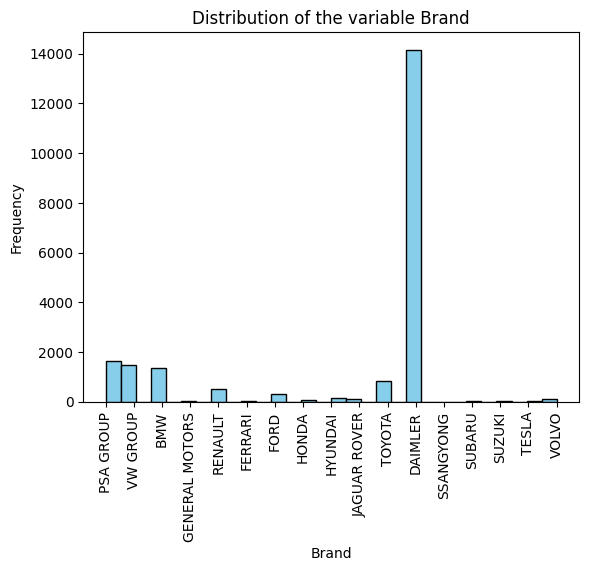

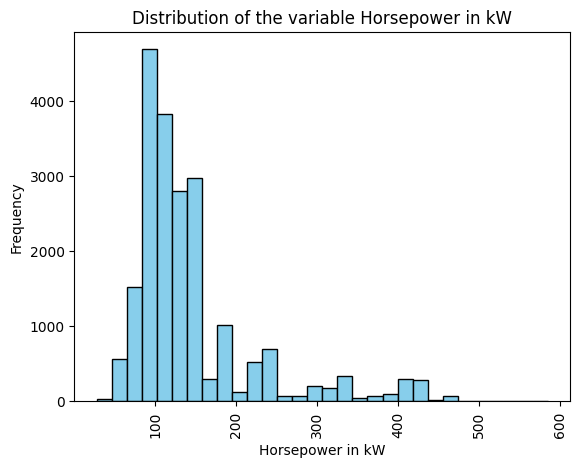

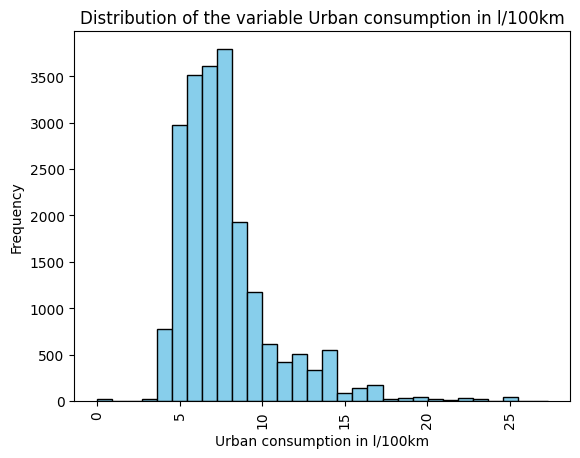

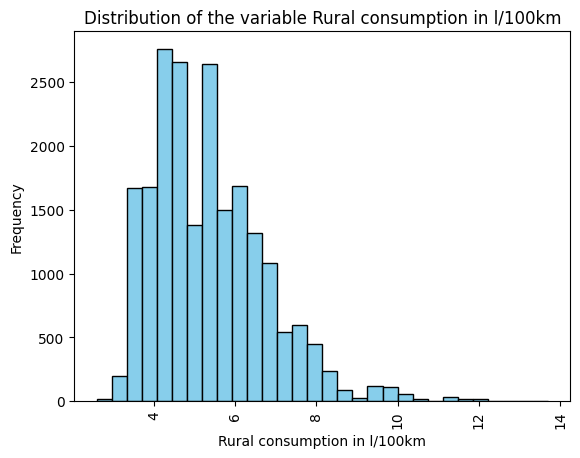

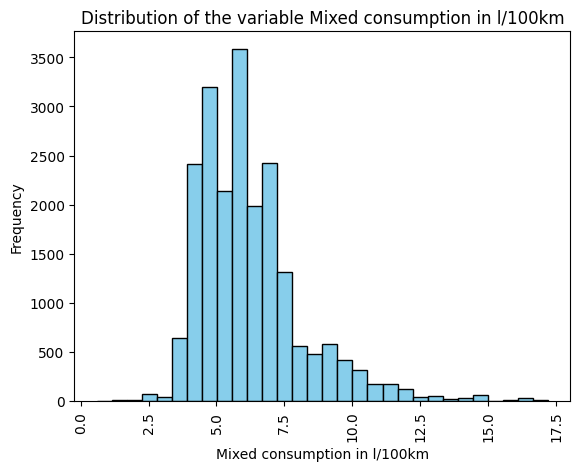

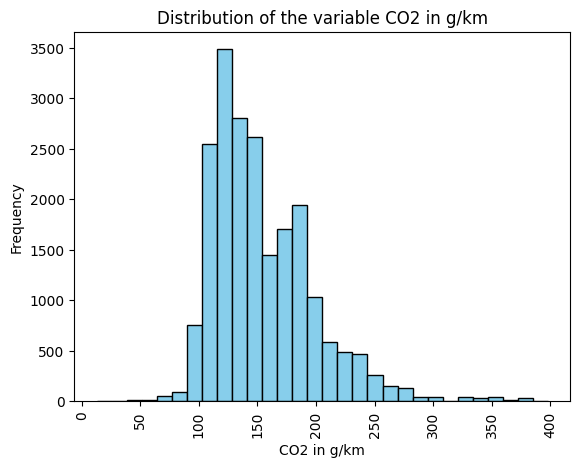

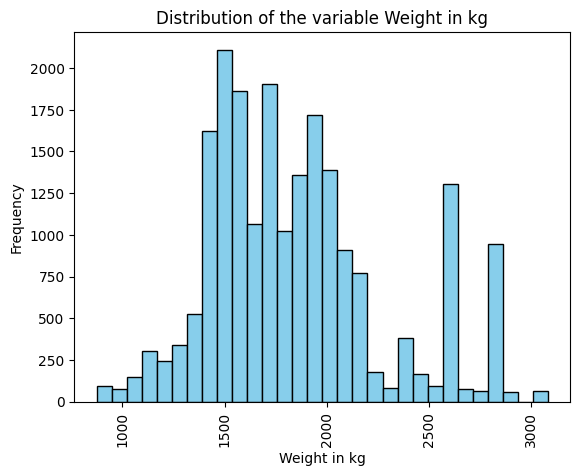

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20880 entries, 0 to 20879
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Brand                         20880 non-null  object 
 1   Horsepower in kW              20880 non-null  float64
 2   Urban consumption in l/100km  20880 non-null  float64
 3   Rural consumption in l/100km  20880 non-null  float64
 4   Mixed consumption in l/100km  20880 non-null  float64
 5   CO2 in g/km                   20880 non-null  float64
 6   Weight in kg                  20880 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ MB


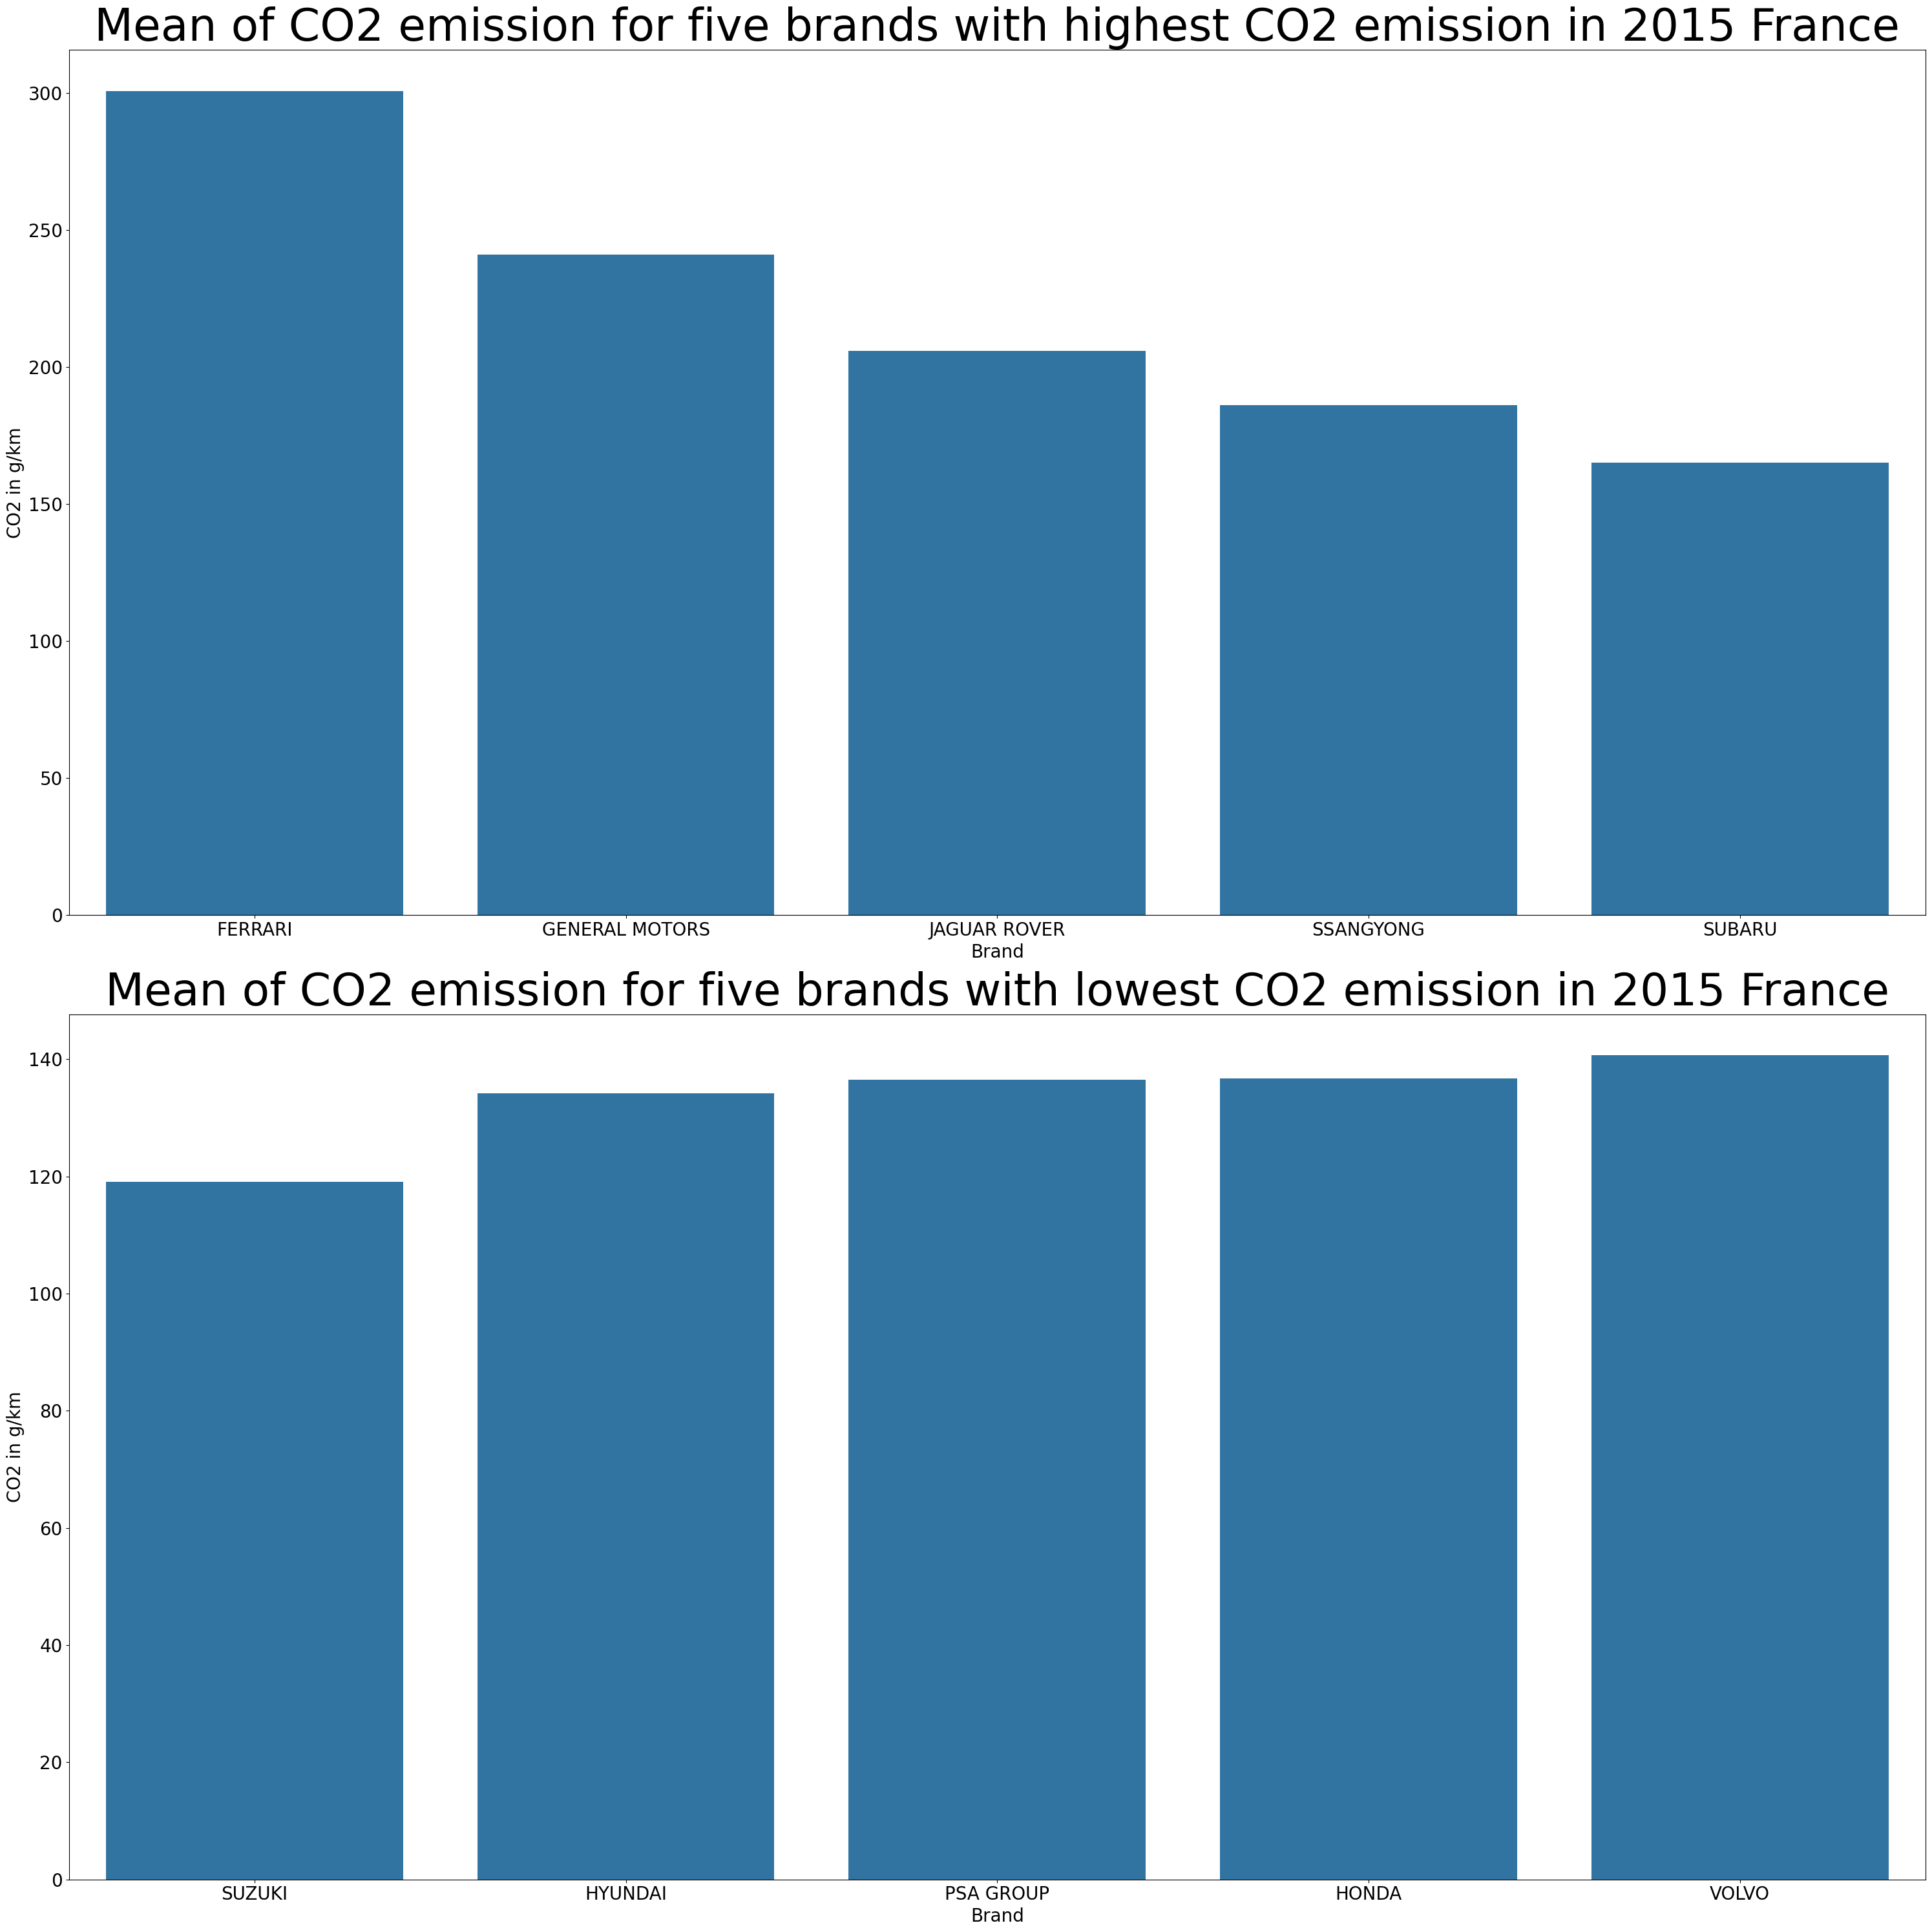

In [ ]:
# drop and rename columns
df = df.drop(columns=['lib_mod_doss', 'hcnox', 'mrq_utac', 'mod_utac', 'dscom', 'cnit', 'tvv', 'energ', 'hybride', 'puiss_admin', 'puiss_heure', 'typ_boite_nb_rapp', 'co_typ_1', 'hc', 'nox', 'ptcl', 'champ_v9', 'date_maj', 'masse_ordma_min'], errors='ignore')
df = df.rename(columns={'co2_mixte': 'CO2 in g/km', 'lib_mrq_doss': 'Brand', 'puiss_max': 'Horsepower in kW', 'conso_urb_93': 'Urban consumption in l/100km', 'conso_exurb': 'Rural consumption in l/100km', 'conso_mixte': 'Mixed consumption in l/100km', 'masse_ordma_max': 'Weight in kg'})

# missing values for the rows in the dataframe in percentage
p =(df.isna().sum())/(len(df)*100)
print(p)

# replacing missing values with median
df['Horsepower in kW'] = df['Horsepower in kW'].fillna(df['Horsepower in kW'].astype(float).median())
df['Urban consumption in l/100km'] = df['Urban consumption in l/100km'].fillna(df['Urban consumption in l/100km'].median())
df['Rural consumption in l/100km'] = df['Rural consumption in l/100km'].fillna(df['Rural consumption in l/100km'].median())
df['Mixed consumption in l/100km'] = df['Mixed consumption in l/100km'].fillna(df['Mixed consumption in l/100km'].median())
df['CO2 in g/km'] = df['CO2 in g/km'].fillna(df['CO2 in g/km'].median())

# cleaning the names of brands
df.Brand = [entry.strip() for entry in df.Brand]

daimler=['MERCEDES BENZ', 'MERCEDES AMG','SMART']
for brand in daimler:
    df.Brand = df.Brand.replace(brand, 'DAIMLER')

ford = ['FORD-CNG-TECHNIK','INFINITI']
for brand in ford:
    df.Brand = df.Brand.replace(brand, 'FORD')

hyundai = ['KIA']
for brand in hyundai:
    df.Brand = df.Brand.replace(brand, 'HYUNDAI')

jagu = ['JAGUAR','JLR','MG','JAGUAR LAND ROVER LIMITED']
for brand in jagu:
    df.Brand = df.Brand.replace(brand,'JAGUAR ROVER')

vw = ['AUDI', 'LAMBORGHINI', 'SKODA', 'PORSCHE','BENTLEY','SEAT','VOLKSWAGEN']
for brand in vw:
    df.Brand = df.Brand.replace(brand, 'VW GROUP')

bmw = ['BMW', 'BMW I','MINI','ROLLS ROYCE']
for brand in bmw:
    df.Brand = df.Brand.replace(brand, 'BMW')

gm = ['CADILLAC', 'CHEVROLET']
for brand in gm:
    df.Brand = df.Brand.replace(brand, 'GENERAL MOTORS')

psa = ['JEEP','CITROEN','OPEL','FIAT', 'PEUGEOT','LANCIA','ALFA ROMEO','MASERATI','DANGEL']
for brand in psa:
    df.Brand = df.Brand.replace(brand, 'PSA GROUP')

renault = ['DACIA','LADA','MITSUBISHI', 'NISSAN']
for brand in renault:
    df.Brand = df.Brand.replace(brand, 'RENAULT')

toyota = ['LEXUS', 'MAZDA']
for brand in toyota:
    df.Brand = df.Brand.replace(brand, 'TOYOTA')

print(df.Brand.unique())
len(df.Brand.unique())

#saved cleaned data in a new csv-file for Power BI
#df.to_csv('/work/cleaned_data_France_2015', index=False)

# display the distribution of the variables
for column in df:
    plt.hist(df[column], bins=30, color='skyblue', edgecolor='black')
    plt.xlabel(column)
    parameter = column
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.title('Distribution of the variable {}'.format(parameter))
    plt.show()

df.info()

#5 brands with the highest CO2 emission in mean and 5 brands with the lowest CO2 emission in mean
df_group= df.groupby('Brand').agg({'CO2 in g/km': 'mean'})
df_group = pd.DataFrame(df_group)
df_5_high = df_group.sort_values(by='CO2 in g/km', ascending=False)
df_5_high = df_5_high.head(5)
df_5_low = df_group.sort_values(by='CO2 in g/km', ascending=True)
df_5_low = df_5_low.head(5)

plt.figure(figsize=(30,30))
plt.subplot(2,1,1)
sns.barplot(x=df_5_high.index, y=df_5_high['CO2 in g/km'])
plt.tick_params(labelsize=20)
plt.ylabel('CO2 in g/km', fontsize=20)
plt.xlabel('Brand', fontsize=20)
plt.title('Mean of CO2 emission for five brands with highest CO2 emission in 2015 France', fontsize=50)
plt.subplot(2,1,2)
sns.barplot(x=df_5_low.index, y=df_5_low['CO2 in g/km'])
plt.tick_params(labelsize=20)
plt.ylabel('CO2 in g/km', fontsize=20)
plt.xlabel('Brand', fontsize=20)
plt.title('Mean of CO2 emission for five brands with lowest CO2 emission in 2015 France', fontsize=50)
plt.tight_layout()
plt.show()



---

Overview of the clean dataset with a function

In [ ]:
# define function to have a overview of the dataset
def prepare(df):

    print("SHORT OVERVIEW")
    print(df.head())
    print(df.info())


    print("ASK FOR DUPLICATES")
    print(df.duplicated().sum())

    print("ASK FOR MISSING VALUES IN PERCENTAGE PER COLUMN")
    p =(df.isna().sum())/(len(df)*100)
    print(p)


    print("UNIQUE VALUES OF ALL COLUMNS")
    for column in df:
        unique_values = df[column].unique()
        print("Unique values of column", column, ":", unique_values)

    return "Preparing end"

---

Show the variable correlations with a heatmap and scatterplots

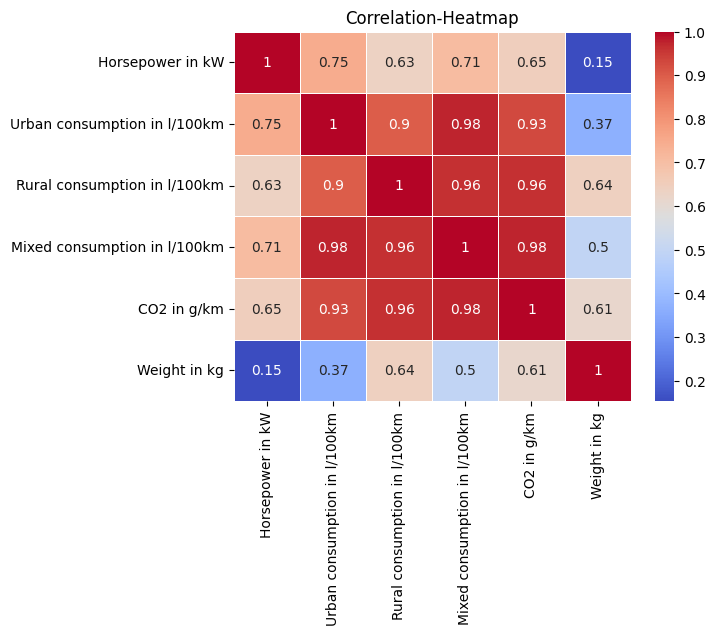

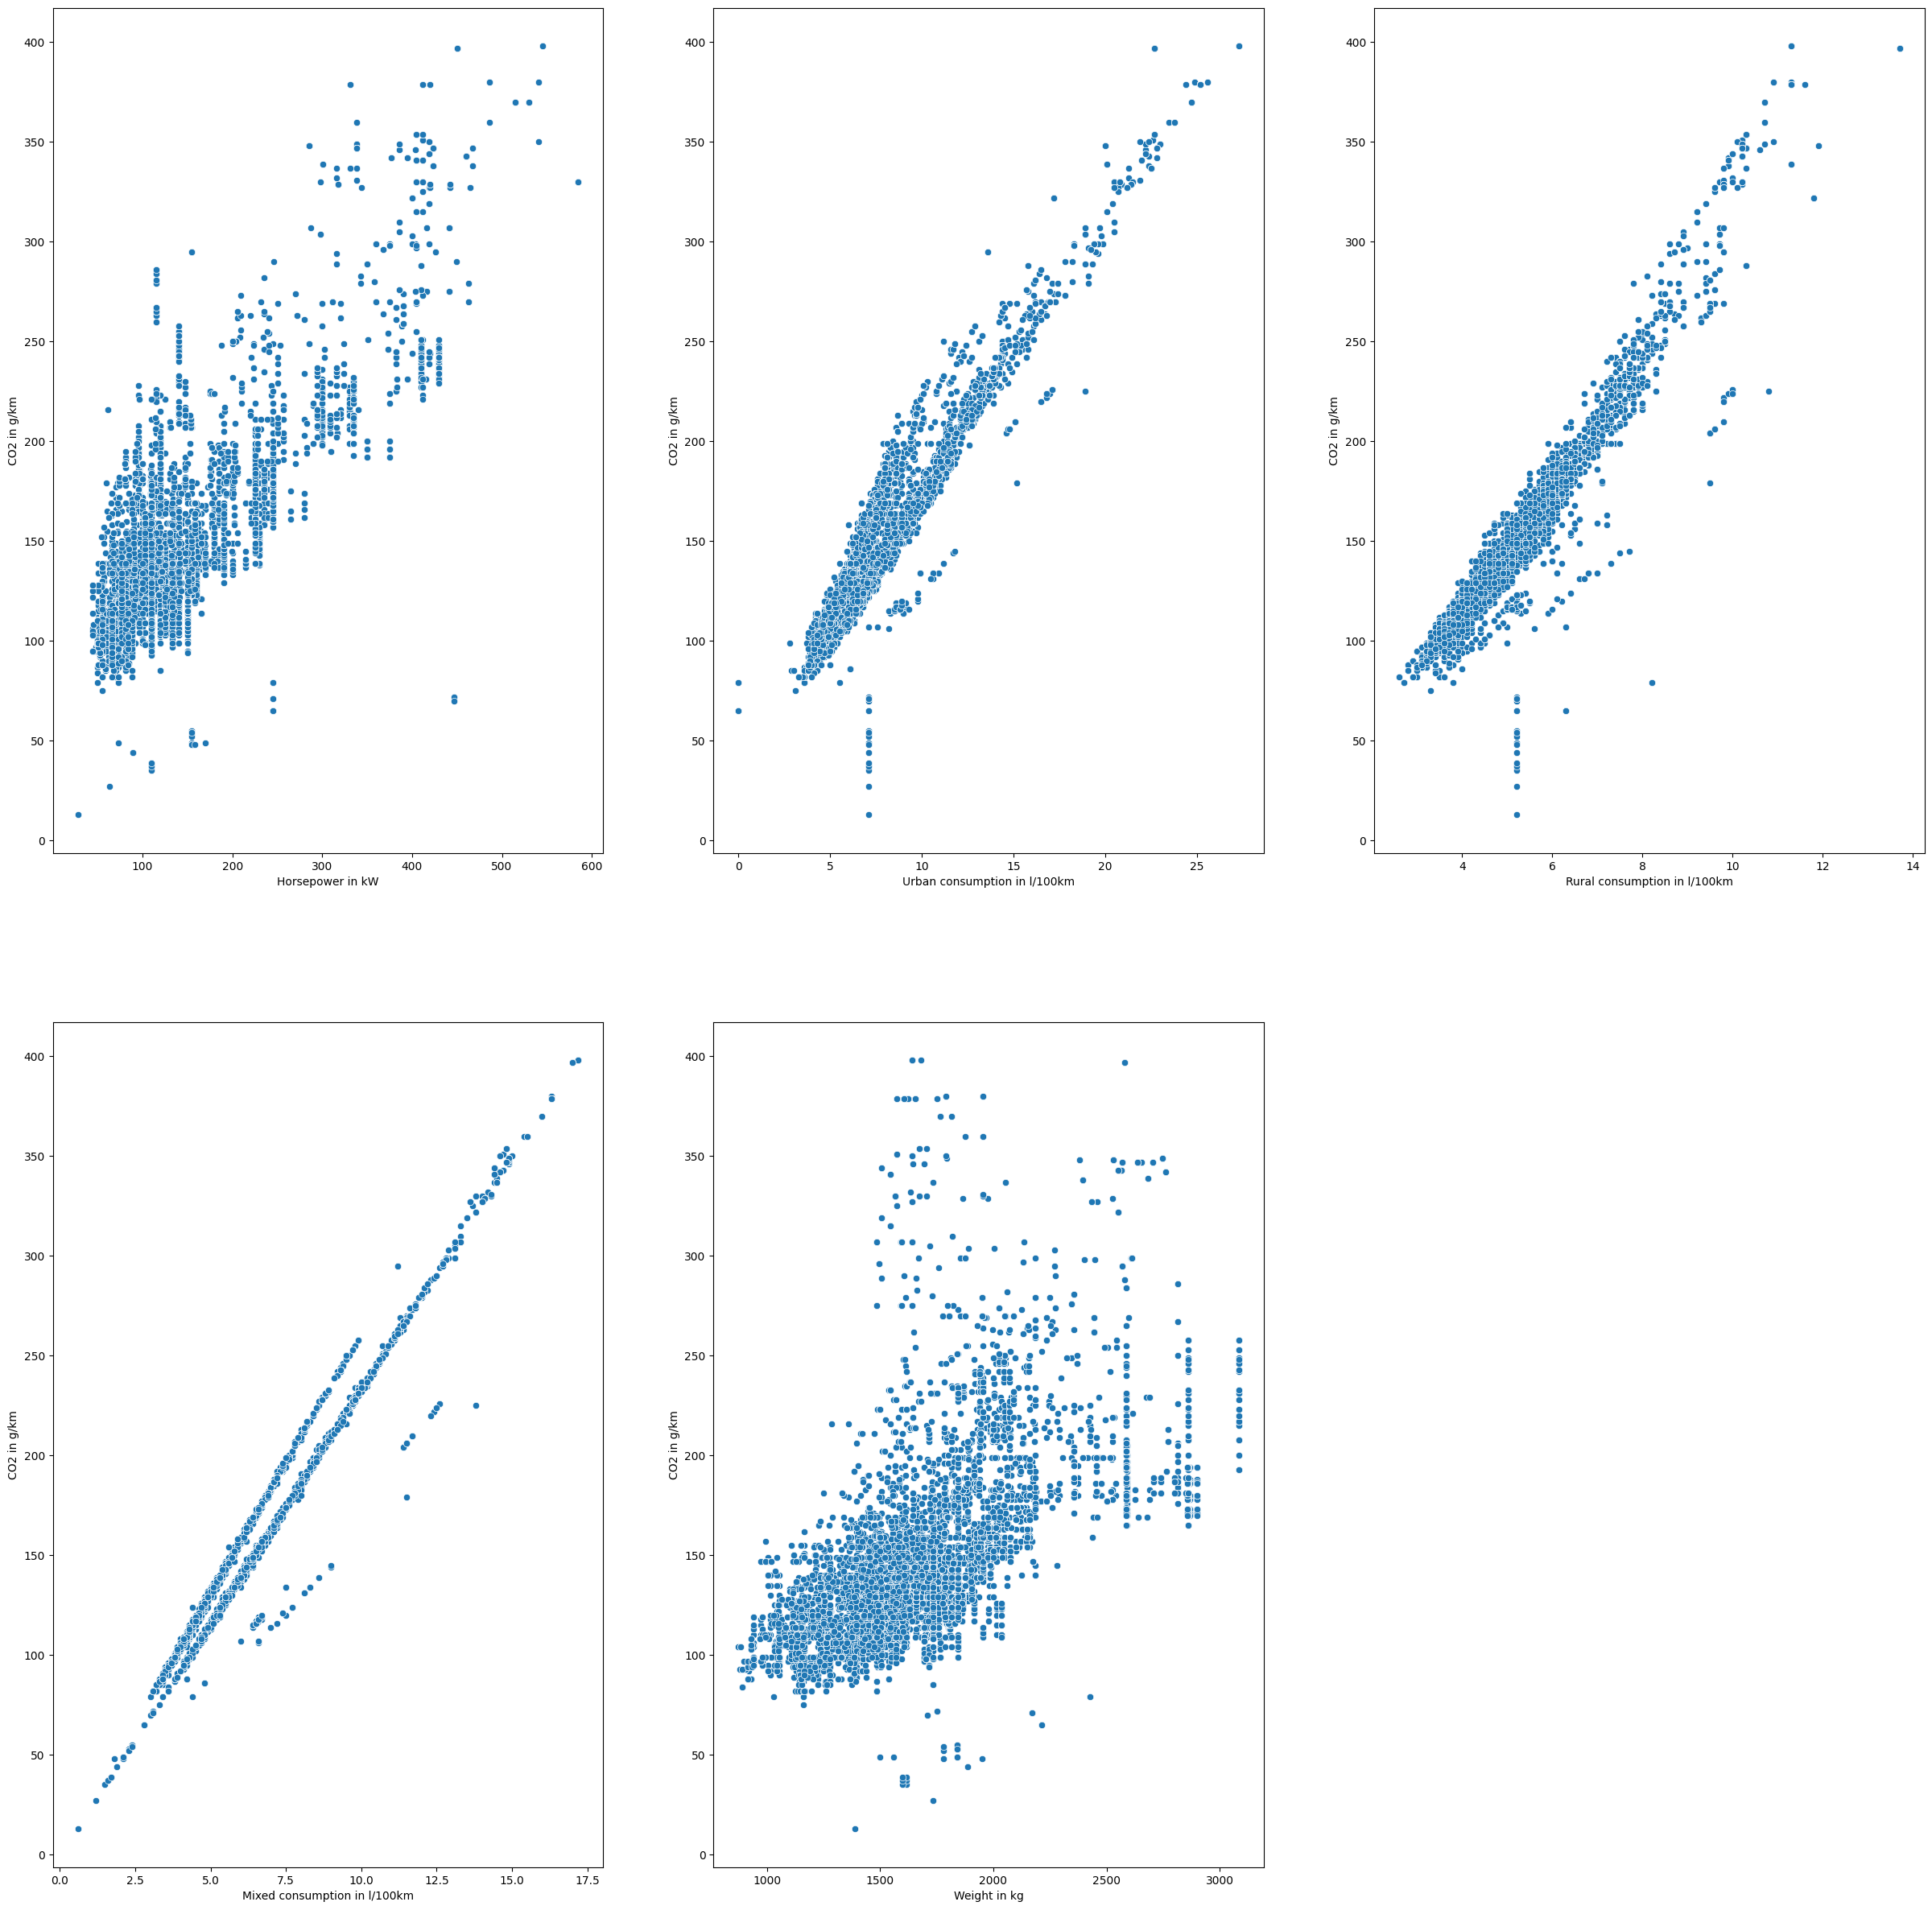

In [ ]:
# select numeric columns for correlation
df_num = df.select_dtypes(include=[int, float])
cor = df_num.corr()

# display heatmap of correlation for the numeric columns
sns.heatmap(cor, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation-Heatmap')
plt.show()

i = 1
plt.figure(figsize=(30,30))
for column in df_num:
    if column != 'CO2 in g/km':
        plt.subplot(2,3,i)
        sns.scatterplot(x=column, y='CO2 in g/km', data=df_num)
        i += 1


---

Normal distributions and QQ plots for the variables

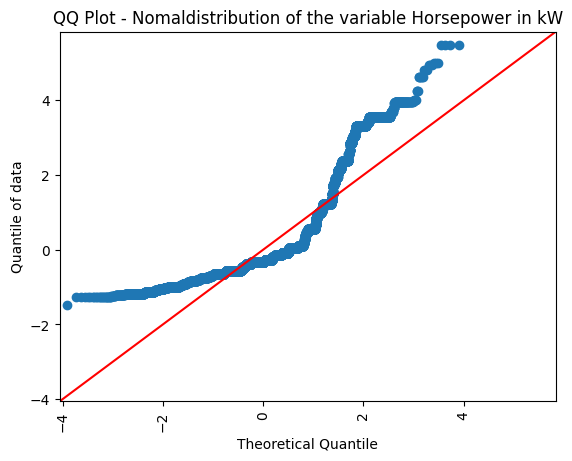

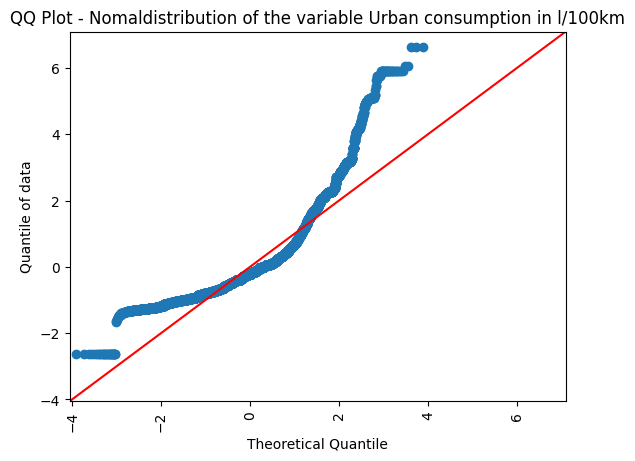

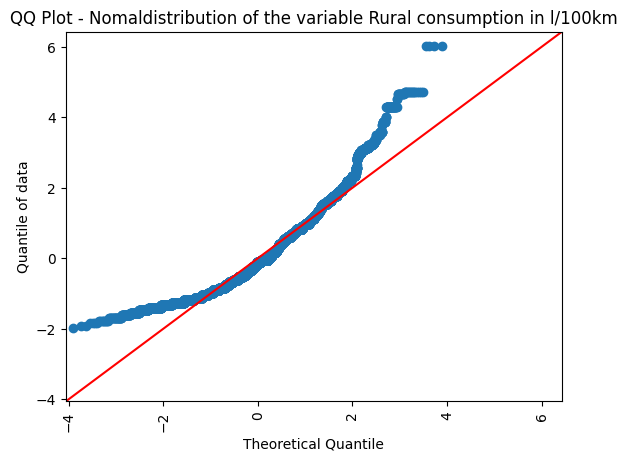

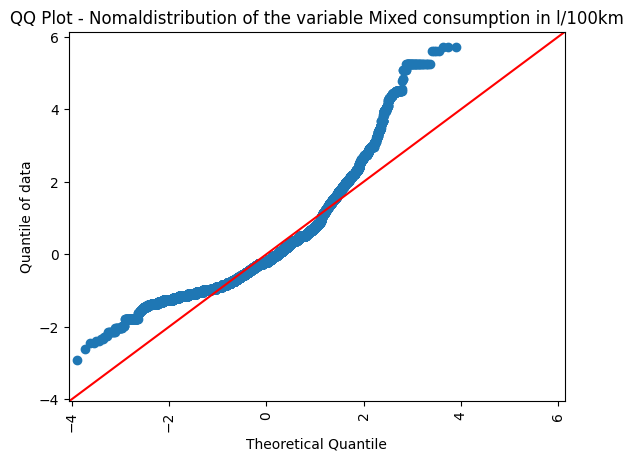

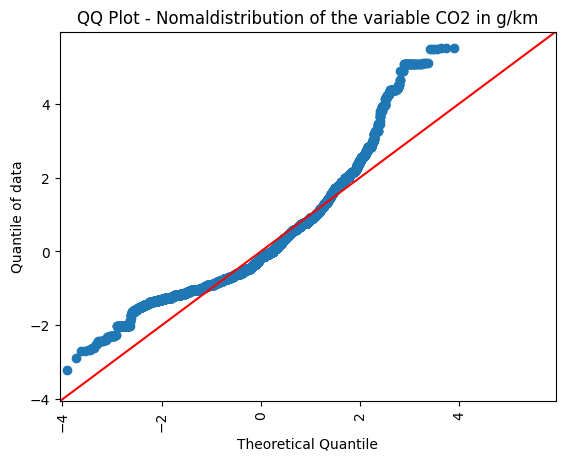

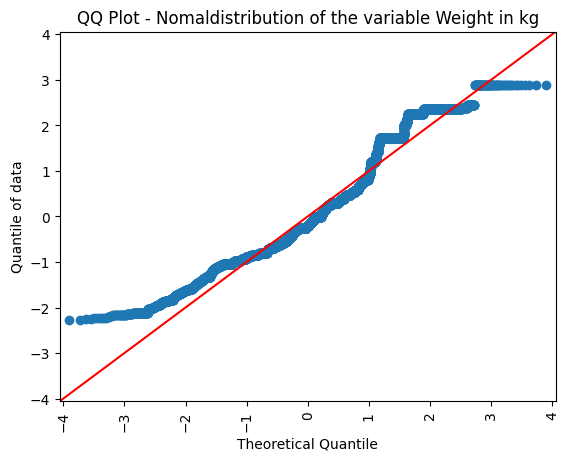

Spearman's Rho: 0.42
p-Wert: 0.0
There is a significant correlation between Horsepower in kW and CO2 emission
Spearman's Rho: 0.92
p-Wert: 0.0
There is a significant correlation between Urban consumption in l/100km and CO2 emission
Spearman's Rho: 0.96
p-Wert: 0.0
There is a significant correlation between Rural consumption in l/100km and CO2 emission
Spearman's Rho: 0.97
p-Wert: 0.0
There is a significant correlation between Mixed consumption in l/100km and CO2 emission
Spearman's Rho: 1.0
p-Wert: 0.0
There is a significant correlation between CO2 in g/km and CO2 emission
Spearman's Rho: 0.71
p-Wert: 0.0
There is a significant correlation between Weight in kg and CO2 emission


In [ ]:
# look for normaldistribution in the numeric variables within the variables with qqplot
from statsmodels import api as sm

for column in df_num:
    sm.qqplot(data=df[column], fit=True, line='45')
    plt.xlabel('Theoretical Quantile')
    parameter = column
    plt.ylabel('Quantile of data')
    plt.xticks(rotation=90)
    plt.title('QQ Plot - Nomaldistribution of the variable {}'.format(parameter))
    plt.show()

# no variable shows a normal distribution so we can't use pearson -> we have to use spearman

# Computing spearman correlation
from scipy.stats import spearmanr
for column in df_num:
    x = df_num[column]
    y = df['CO2 in g/km']
    rho, p_value = spearmanr(x, y)
    rho = round(rho, 2)
    if p_value < 0.05:
        print("Spearman's Rho:", rho)
        print("p-Wert:", p_value)
        print('There is a significant correlation between', column, 'and CO2 emission')
    else:
        print("Spearman's Rho:", rho)
        print("p-Wert:", p_value)
        print('There is no significant correlation between', column, 'and CO2 emission')


---

MODELING

In [ ]:
!pip install sklearn.preprocessing

In [ ]:
# separation of dataset into training and test set and deleting the variable Brand
from sklearn.model_selection import train_test_split

X = df.drop(['CO2 in g/km', 'Brand'], axis=1)
y = df['CO2 in g/km']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# transformation of test set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# no need to encode the categorial variable, because we deleted it
# the modalities of Brand were too many and there was no further possibility to decrease them
# and still get a proper result - which is to have a realistic sense of outcome of the model

# REGRESSION MODELS
# import models and metrics for regression
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

# built a list of regression models to compare
lin = LinearRegression()
log = LogisticRegression()
tree = DecisionTreeRegressor()
forest = RandomForestRegressor()
knn = KNeighborsRegressor(n_neighbors=5)
models = [lin, log, tree, forest, knn]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('r_squared of', model,'on test set:',round(r2_score(y_test, y_pred),4))
    print('Mean Squared Error (MSE) on', model,':', round(mean_squared_error(y_test, y_pred),2))

r_squared of LinearRegression() on test set: 0.9743
Mean Squared Error (MSE) on LinearRegression() : 49.41


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


r_squared of LogisticRegression() on test set: 0.9208
Mean Squared Error (MSE) on LogisticRegression() : 152.15
r_squared of DecisionTreeRegressor() on test set: 0.9966
Mean Squared Error (MSE) on DecisionTreeRegressor() : 6.59
r_squared of RandomForestRegressor() on test set: 0.9968
Mean Squared Error (MSE) on RandomForestRegressor() : 6.11
r_squared of KNeighborsRegressor() on test set: 0.9952
Mean Squared Error (MSE) on KNeighborsRegressor() : 9.14


---

Optimization of the logistic regression model

In [ ]:
# changing different parameter
reg_01 = LogisticRegression( tol=0.0009, C=10.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
reg_02 = LogisticRegression( tol=0.0009, C=1000.0, fit_intercept=True, intercept_scaling=1, random_state=42, solver='lbfgs', max_iter=100, verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
reg_03 = LogisticRegression( tol=0.1, C=1000.0, fit_intercept=True, intercept_scaling=0.4, random_state=42, solver='lbfgs', max_iter=10, verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
reg_04 = LogisticRegression( tol=0.0009, C=1000.0, fit_intercept=True, intercept_scaling=1, random_state=42, solver='sag', max_iter=100, verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
reg_05 = LogisticRegression( tol=0.0009, C=10.0, fit_intercept=False, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
reg_06 = LogisticRegression( tol=0.001, C=10.0, max_iter=100)

models = [reg_01, reg_02, reg_03, reg_04, reg_05, reg_06]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('r_squared of', model,'on test set:',round(r2_score(y_test, y_pred),4))
    print('Mean Squared Error (MSE) on', model,':', round(mean_squared_error(y_test, y_pred),2))

# OPTIMIZATION WITH GRIDSEARCH
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
scorer = make_scorer(r2_score)
param_grid = [{'tol':[0.001], 'C':[10.0], 'max_iter':[1,10]}]
grid = GridSearchCV(log, param_grid, cv=5, scoring=scorer)
grid.fit(X_train, y_train)

print('best parameters by gridsearch:',grid.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


r_squared of LogisticRegression(C=10.0, tol=0.0009) on test set: 0.959
Mean Squared Error (MSE) on LogisticRegression(C=10.0, tol=0.0009) : 78.73


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


r_squared of LogisticRegression(C=1000.0, random_state=42, tol=0.0009) on test set: 0.9553
Mean Squared Error (MSE) on LogisticRegression(C=1000.0, random_state=42, tol=0.0009) : 85.8


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


r_squared of LogisticRegression(C=1000.0, intercept_scaling=0.4, max_iter=10,
                   random_state=42, tol=0.1) on test set: 0.8522
Mean Squared Error (MSE) on LogisticRegression(C=1000.0, intercept_scaling=0.4, max_iter=10,
                   random_state=42, tol=0.1) : 283.99


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


r_squared of LogisticRegression(C=1000.0, random_state=42, solver='sag', tol=0.0009) on test set: 0.9459
Mean Squared Error (MSE) on LogisticRegression(C=1000.0, random_state=42, solver='sag', tol=0.0009) : 104.03


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


r_squared of LogisticRegression(C=10.0, fit_intercept=False, tol=0.0009) on test set: 0.4416
Mean Squared Error (MSE) on LogisticRegression(C=10.0, fit_intercept=False, tol=0.0009) : 1072.96


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


r_squared of LogisticRegression(C=10.0, tol=0.001) on test set: 0.959
Mean Squared Error (MSE) on LogisticRegression(C=10.0, tol=0.001) : 78.73


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

best parameters by gridsearch: {'C': 10.0, 'max_iter': 10, 'tol': 0.001}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---

Preparing dataset for classification

<ipython-input-18-25d4bc163409>:35: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.energy_class =df.energy.astype('object')


['E' 'B' 'G' 'F' 'D' 'C' 'A' 'A+' 'A+++' 'A++']
       Brand  Horsepower in kW  Urban consumption in l/100km  \
0  PSA GROUP             147.0                          11.3   
1  PSA GROUP             125.0                           6.6   
2  PSA GROUP             100.0                           6.6   
3  PSA GROUP             100.0                           6.6   
4  PSA GROUP             125.0                           6.9   

   Rural consumption in l/100km  Mixed consumption in l/100km  CO2 in g/km  \
0                           5.8                           7.8        182.0   
1                           4.3                           5.1        136.0   
2                           4.2                           5.1        134.0   
3                           4.2                           5.1        134.0   
4                           4.3                           5.3        139.0   

   Weight in kg    percent energy  
0          1505   5.909309      E  
1          1565 -23.266734

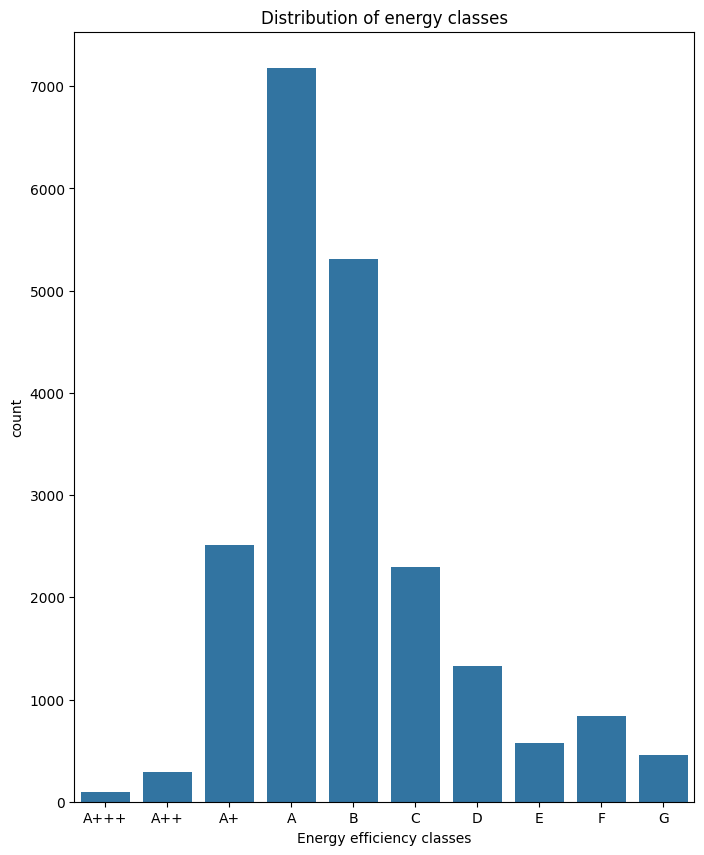

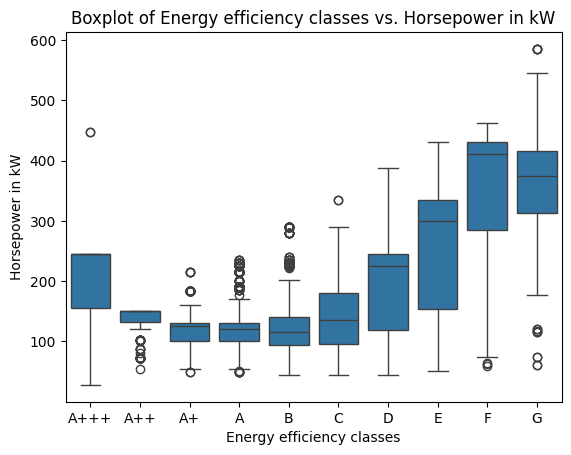

Spearman's Rho: 0.37
p-Value: 0.0
There is a significant correlation between Horsepower in kW and energy class


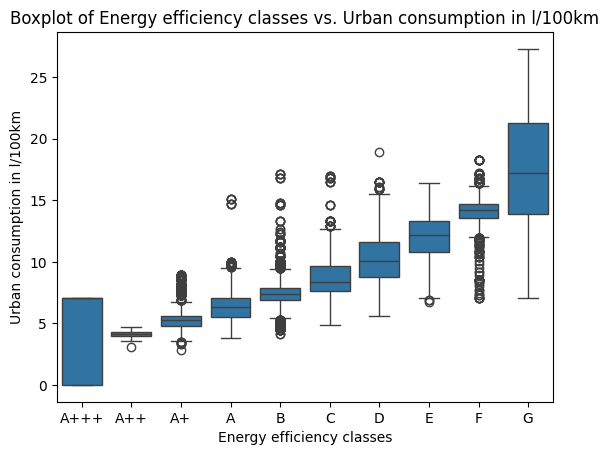

Spearman's Rho: 0.64
p-Value: 0.0
There is a significant correlation between Urban consumption in l/100km and energy class


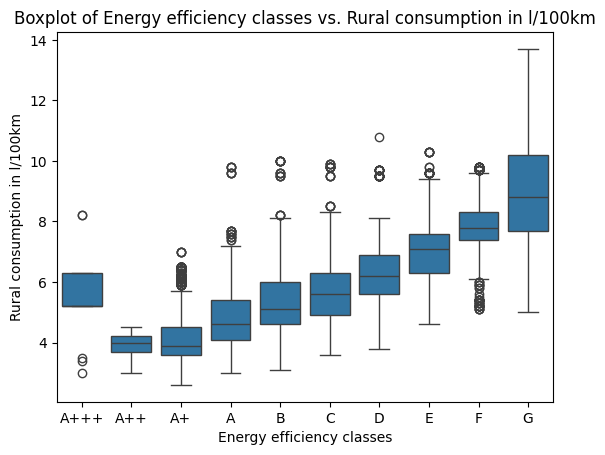

Spearman's Rho: 0.48
p-Value: 0.0
There is a significant correlation between Rural consumption in l/100km and energy class


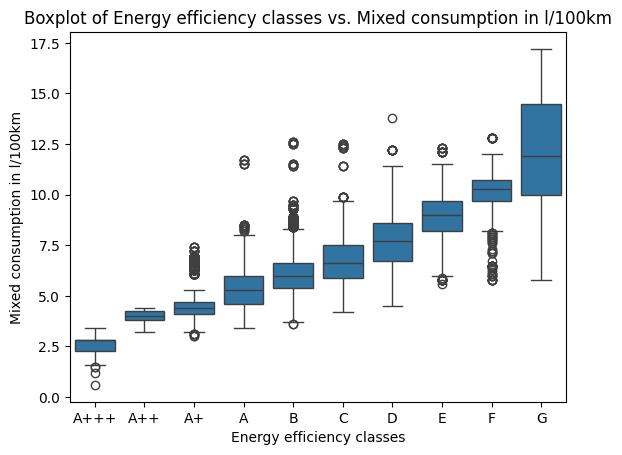

Spearman's Rho: 0.56
p-Value: 0.0
There is a significant correlation between Mixed consumption in l/100km and energy class


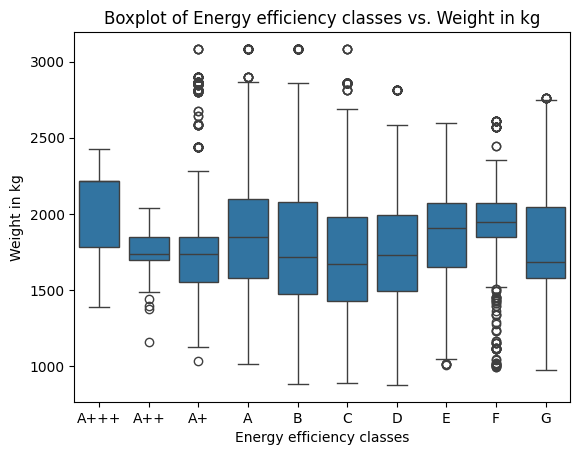

Spearman's Rho: -0.1
p-Value: 0.0
There is a significant correlation between Weight in kg and energy class


In [ ]:
# Calculation of reference values
#R [g/km] = 36,59079 + 0,08987 × M(weight) is the reference value per car we need to calculate the efficiency
R = 36.59079 + 0.08987 * df['Weight in kg']
#CO2Diff. [%] = (CO2Pkw – R) × 100 / R for each car calculating the energy efficiency
df['percent'] = (df['CO2 in g/km']- R)*100/R

# creating a function to assign the efficiency classes from A+++ to G
def assign_efficiency_class(x):
    if x <= -55:
        return 'A+++'
    elif -55 < x <= -46:
        return 'A++'
    elif -46 < x <= -37:
        return 'A+'
    elif -37 < x <= -28:
        return 'A'
    elif -28 < x <= -19:
        return 'B'
    elif -19 < x <= -10:
        return 'C'
    elif -10 < x <= -1:
        return 'D'
    elif -1 < x <= 8:
        return 'E'
    elif 8 < x <= 17:
        return 'F'
    elif x > 17:
        return 'G'
    else:
        return np.nan

# Apply efficiency class function to create 'energy' column
df['energy'] = df['percent'].apply(assign_efficiency_class)
df.energy_class =df.energy.astype('object')
print(df.energy.unique())
print(df.head())

# general distribution of Energy classes
plt.figure(figsize=(8 ,10))
energy_order = ['A+++', 'A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G']
sns.countplot( x=df["energy"], order = energy_order)
plt.title('Distribution of energy classes')
plt.xlabel('Energy efficiency classes')
plt.show()

# Illustrations of Boxplots on the relationships with Energy classes
# determine new transformed dataset and check for correlation
# import package from library
from scipy.stats import spearmanr
df = df.drop(['Brand','percent', 'CO2 in g/km'], axis=1)
# for loop to create boxplots and correlation on relationsships with energy class
# correlation possible because of ordered categorial variable
for column in df:
    if column != 'energy':
        energy_order = ['A+++', 'A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G']
        sns.boxplot(x=(df['energy']), y=df[column], order=energy_order)
        plt.xlabel('Energy efficiency classes')
        plt.ylabel(column)
        parameter = column
        plt.title('Boxplot of Energy efficiency classes vs. {}'.format(parameter))
        plt.show()

        rho, p_value = spearmanr(df[column], df['energy'])
        rho = round(rho, 2)
        p_value = round(p_value, 2)
        if p_value < 0.05:
            print("Spearman's Rho:", rho)
            print("p-Value:", p_value)
            print('There is a significant correlation between',column,'and energy class')
        else:
            print("Spearman's Rho:", rho)
            print("p-Value:", p_value)
            print('There is no significant correlation between',column,'and energy class')


---

Classification models

In [ ]:
# separation of dataset into training and test set and dropping not needed variables for classification
X = df.drop(['Urban consumption in l/100km','Rural consumption in l/100km','energy'], axis=1)
y = df['energy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# transformation of test set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# CLASSIFICATION MODELS
# import models and metrics for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score, roc_curve
from joblib import dump

# built a list of classification models to compare
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
svm = SVC(kernel='rbf')
models = [tree, forest, svm]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy of', model,' on test set:',round(model.score(X_test, y_test),2))
    ct = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'])
    print('The confusion matrix of', model,'is:')
    print(ct)
    print('The classfication report of', model,'is:')
    print(classification_report(y_test, y_pred))

Accuracy of DecisionTreeClassifier()  on test set: 0.97
The confusion matrix of DecisionTreeClassifier() is:
Predicted     A   A+  A++  A+++     B    C    D    E    F   G
True                                                         
A          1374   14    0     0     4    0    0    2    0   0
A+           23  490    0     0     2    0    0    0    0   0
A++           0    2   64     0     0    0    0    0    0   0
A+++          0    0    1    14     0    0    0    0    0   0
B            18    0    0     0  1064   11    1    0    0   0
C             0    1    0     0    10  458    6    0    0   0
D             1    0    0     0     0   13  229    5    0   1
E             0    0    0     0     0    0    4  111    1   3
F             0    0    0     0     0    1    0    2  161   2
G             0    0    0     0     0    2    0    0    1  80
The classfication report of DecisionTreeClassifier() is:
              precision    recall  f1-score   support

           A       0.97      0.99  

---

Classification models with other variables dropped

In [ ]:
# separation of dataset into training and test set and dropping 'Mixed consumption in l/100km' (because most correlated)
# keeping 'Urban consumption' and 'Rural consumption'
X = df.drop(['Mixed consumption in l/100km','energy'], axis=1)
y = df['energy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# transformation of test set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# built a list of classification models to compare
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
svm = SVC(kernel='rbf')
models = [tree, forest, svm]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy of', model,' on test set:',round(model.score(X_test, y_test),2))
    ct = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'])
    print('The confusion matrix of', model,'is:')
    print(ct)
    print('The classfication report of', model,'is:')
    print(classification_report(y_test, y_pred))


Accuracy of DecisionTreeClassifier()  on test set: 0.97
The confusion matrix of DecisionTreeClassifier() is:
Predicted     A   A+  A++  A+++     B    C    D    E    F   G
True                                                         
A          1377   10    0     0     6    1    0    0    0   0
A+            5  510    0     0     0    0    0    0    0   0
A++           0    3   63     0     0    0    0    0    0   0
A+++          0    0    0    14     0    1    0    0    0   0
B            19    0    0     0  1058   14    2    1    0   0
C             1    0    0     1    15  448    8    0    2   0
D             0    0    0     0     1   10  233    4    0   1
E             0    0    0     0     0    0    5  110    4   0
F             0    0    0     0     0    0    0    0  163   3
G             0    0    0     0     0    0    0    1    2  80
The classfication report of DecisionTreeClassifier() is:
              precision    recall  f1-score   support

           A       0.98      0.99  

---

Optimization of SVC model

In [ ]:
from sklearn.datasets import load_iris

# Define hyperparameter grid
param_grid = {'C': [100, 10, 11, 1, 222],
              'gamma': [ 0.001, 0.1, 0.002]}

# Instantiate SVM classifier
svm = SVC()

# Instantiate GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit GridSearchCV
grid_search.fit(X, y)

# Get best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

# Retrain the SVM with the best hyperparameters found in GridSearchCV
svm_best = SVC(**best_params)
svm_best.fit(X_train, y_train)

print('Accuracy on test set:', round(svm_best.score(X_test, y_test),4))

KeyboardInterrupt: 

---

Show the distribution of the energy classes within the variables

<Figure size 3000x3000 with 0 Axes>

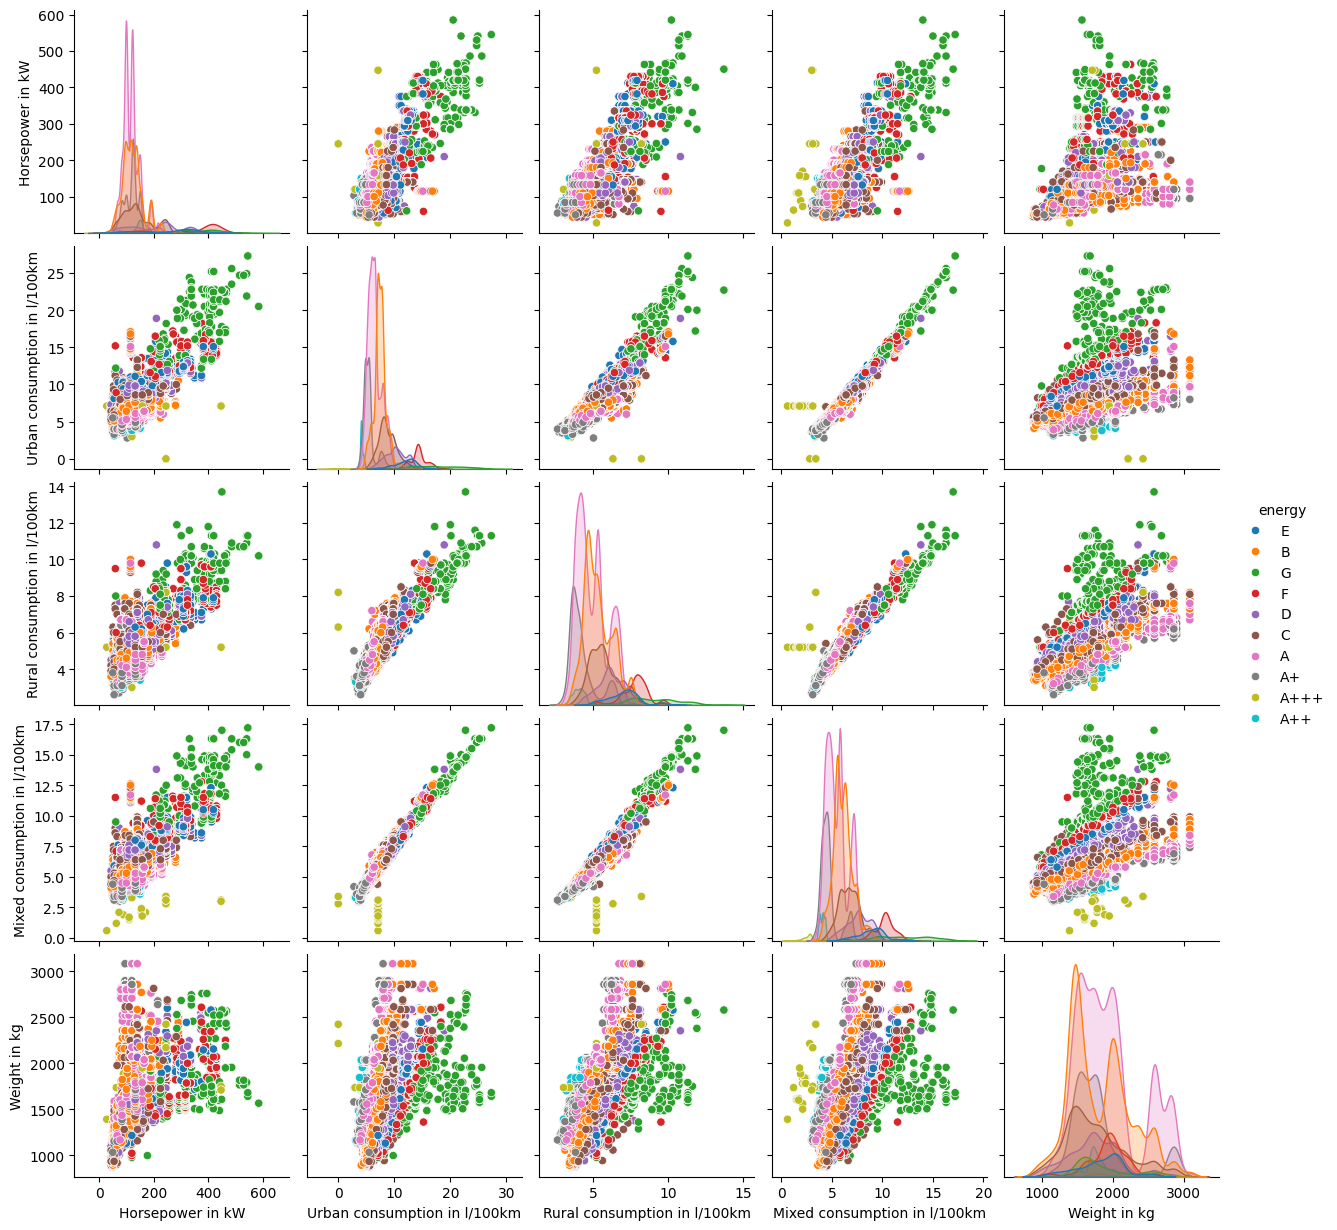

In [ ]:
# distribution of Energy classes within the variables
plt.figure(figsize=(30,30))
sns.pairplot(df[df.columns[0:]], hue='energy')
plt.show()


---

PCA and Clustering

[1.84303239e+05 6.25251725e+03 3.70563297e+00 1.34601961e-01]
4
[9.67168500e-01 3.28113481e-02 1.94460580e-05 7.06350998e-07]


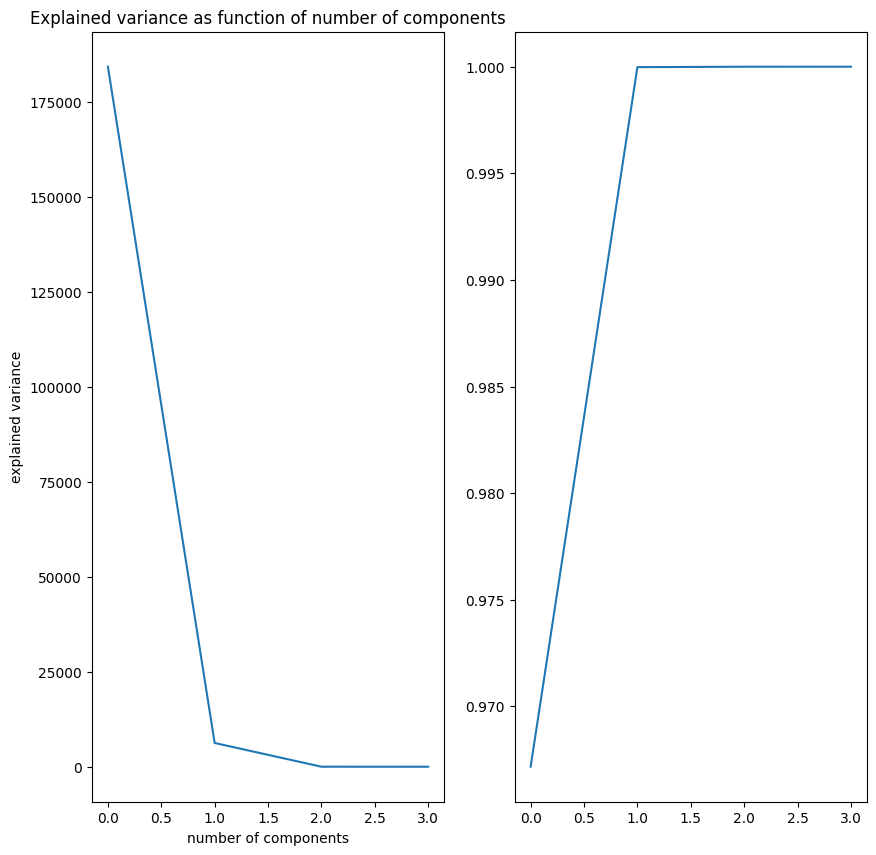

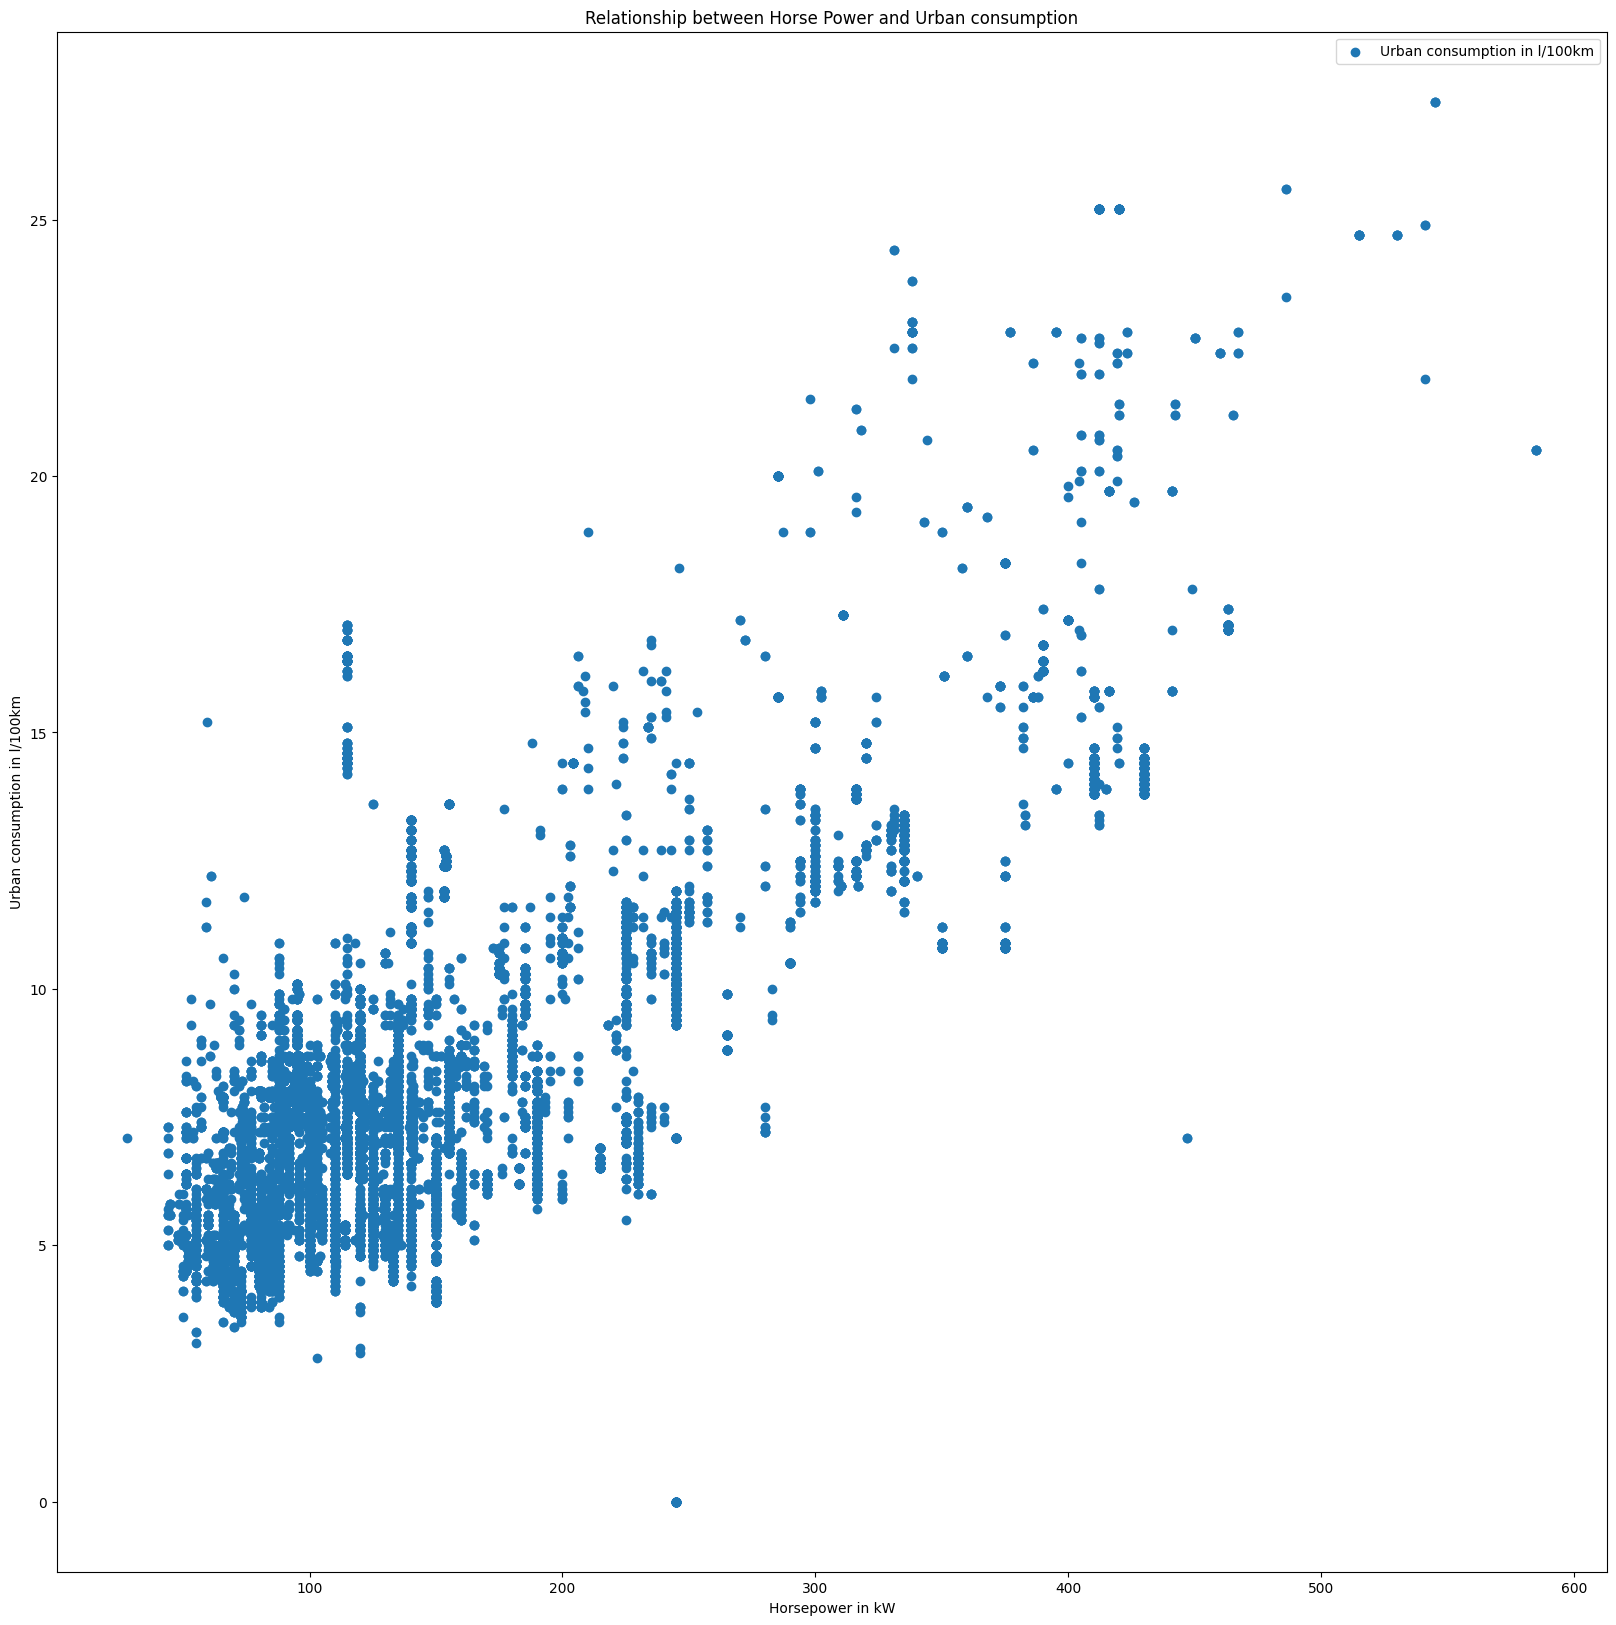

[[118.48358475   6.94107431]
 [315.6922813   12.66072041]]


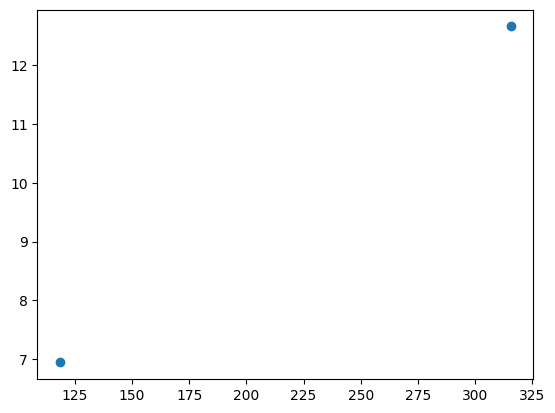

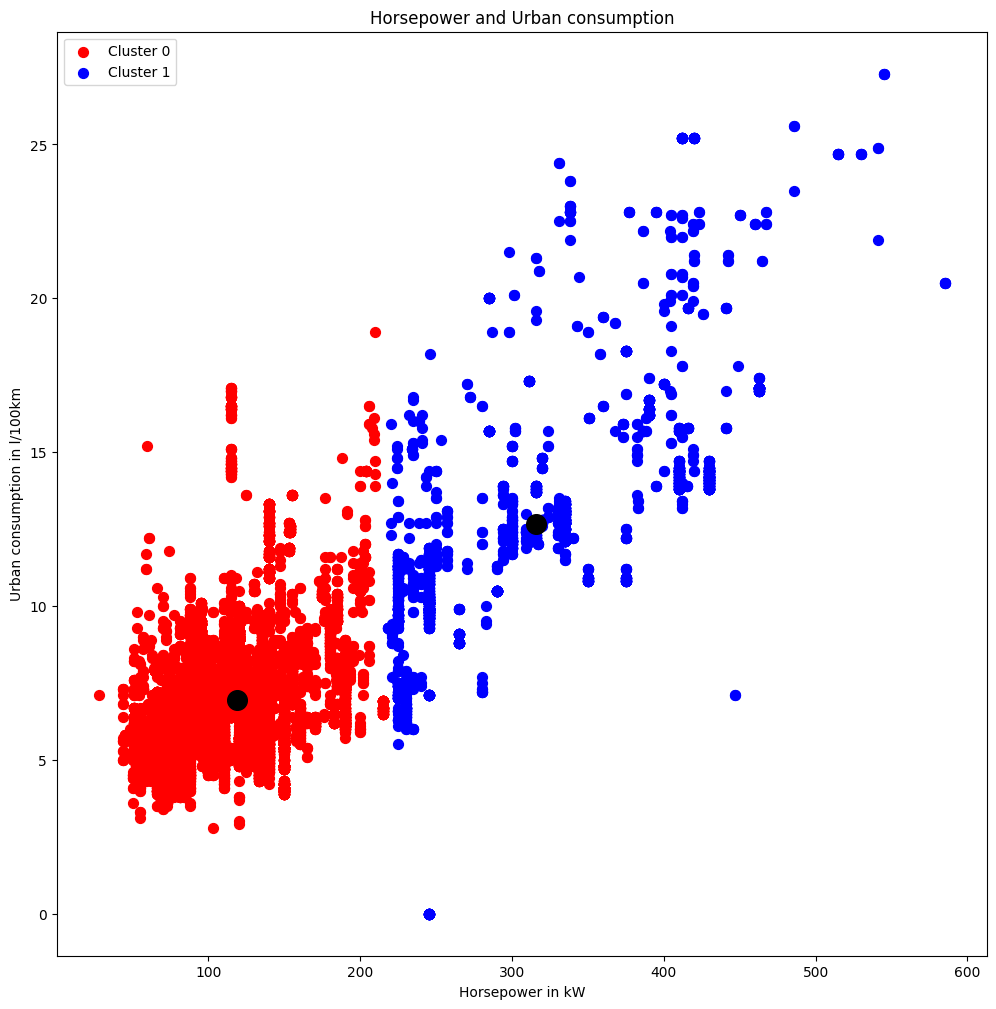

In [ ]:
# PCA for the correlating variables to transform in a new variable
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline

# To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# PCA
pca = PCA()
Coord = pca.fit_transform(X)
print(pca.explained_variance_)
print(len(pca.explained_variance_))

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.lineplot(x=np.arange(len(pca.explained_variance_)), y=pca.explained_variance_)
plt.title("Explained variance as function of number of components")
plt.xlabel("number of components")
plt.ylabel("explained variance")
plt.subplot(1,2,2)
print(pca.explained_variance_ratio_)
sns.lineplot(x=np.arange(len(pca.explained_variance_ratio_)), y=np.cumsum(pca.explained_variance_ratio_))
plt.show()

#CLUSTERING
# replace the energy classes with numbers
df['energy'] = df['energy'].replace({'A+++': 0, 'A++': 1, 'A+':2, 'A':3, 'B':4, 'C':5, 'D':6, 'E':7, 'F':8, 'G':9})

# Looking for two variables and their clusters
plt.figure(figsize=(20,20))
plt.scatter(x="Horsepower in kW" , y= "Urban consumption in l/100km", data=df)
plt.legend()
plt.title("Relationship between Horse Power and Urban consumption")
plt.xlabel("Horsepower in kW")
plt.ylabel("Urban consumption in l/100km")
plt.show()

# df_kmeans contains only the variables 'Horsepower in kW' and 'Urban consumption in l/100km'
df_kmeans=pd.DataFrame(df.loc[:,['Horsepower in kW', 'Urban consumption in l/100km']])

kmeans=KMeans(n_clusters = 2)
kmeans.fit(df_kmeans)
y_kmeans = kmeans.predict(df_kmeans)

print(kmeans.cluster_centers_)

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1])

plt.figure(figsize=(12,12))

plt.scatter(df_kmeans[y_kmeans == 0].iloc[:,0], df_kmeans[y_kmeans == 0].iloc[:,1],
                s = 50, c = 'red', label = 'Cluster 0')

plt.scatter(df_kmeans[y_kmeans == 1].iloc[:,0], df_kmeans[y_kmeans == 1].iloc[:,1],
                s = 50, c = 'blue', label = 'Cluster 1')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', s=200)

plt.xlabel('Horsepower in kW')
plt.ylabel('Urban consumption in l/100km')
plt.title('Horsepower and Urban consumption')
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=967ee787-9a40-4c7d-847e-f41c868d0706' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>